# Cross-Country Solar Farm Analysis
Task 3: Comparing Benin, Sierra Leone, and Togo

In this notebook, we'll compare solar data across three countries to identify the most promising regions for solar investments. We'll use both our new modular scripts and manual analysis to ensure robust comparisons.
 Step 1: Import Required Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys

# Add src to path to import our modular scripts
sys.path.append('../src')

# Import our modular classes
from data_processing.cleaner import DataCleaner
from visualization.plotter import SolarDataVisualizer, compare_all_countries

pd.options.display.max_columns = None
sns.set(style="whitegrid", rc={"figure.figsize": (10, 6)})

## Step 2: Load All Country Data Using Modular Script

First, we'll use our new modular visualization script to automatically load and compare all three countries. This demonstrates the power of organized, reusable code.

The `compare_all_countries()` function will:
- Load all cleaned datasets
- Generate comparison boxplots
- Create a summary statistics table
- Save visualizations automatically

In [2]:
# Step 2: Load All Country Data Using Our Modular Script
print("Loading and comparing all countries using modular script...")
summary_df = compare_all_countries()

if summary_df is not None:
    display(summary_df)
else:
    print("Could not load country data. Please check file paths.")

Loading and comparing all countries using modular script...
File not found: data/benin_clean.csv
File not found: data/sierra_leone_clean.csv
File not found: data/togo_clean.csv
Need at least 2 countries with data for comparison
Could not load country data. Please check file paths.


## Step 3: Load Cleaned Country Data

We'll load the pre-cleaned CSV files that were created during Task 2 EDA. These files have already been processed to handle missing values and outliers, making them ready for cross-country comparison.

In [6]:
# Load cleaned data for all countries
benin = pd.read_csv("../data/benin_clean.csv")
sierra_leone = pd.read_csv("../data/sierraleone_clean.csv") 
togo = pd.read_csv("../data/togo_clean.csv")

print("Data loaded successfully:")
print(f"Benin: {benin.shape}")
print(f"Sierra Leone: {sierra_leone.shape}")
print(f"Togo: {togo.shape}")

# Create countries dictionary for easy access
countries_data = {
    'Benin': benin,
    'Sierra Leone': sierra_leone, 
    'Togo': togo
}

Data loaded successfully:
Benin: (525600, 19)
Sierra Leone: (525600, 19)
Togo: (525600, 19)


## Step 4: Metric Comparison - Boxplots

Now we'll create side-by-side boxplots to visually compare the distribution of key solar metrics across countries:

- **GHI (Global Horizontal Irradiance)**: Total solar radiation on a horizontal surface
- **DNI (Direct Normal Irradiance)**: Direct solar radiation perpendicular to sun's rays  
- **DHI (Diffuse Horizontal Irradiance)**: Scattered solar radiation

Boxplots help us see:
- Median values (middle line)
- Data spread (box shows 25th-75th percentile)
- Outliers (dots beyond whiskers)
- Country-to-country differences

/tmp/ipykernel_16100/1931566160.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(ghi_data, labels=['Benin', 'Sierra Leone', 'Togo'])
/tmp/ipykernel_16100/1931566160.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(dni_data, labels=['Benin', 'Sierra Leone', 'Togo'])
/tmp/ipykernel_16100/1931566160.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(dhi_data, labels=['Benin', 'Sierra Leone', 'Togo'])


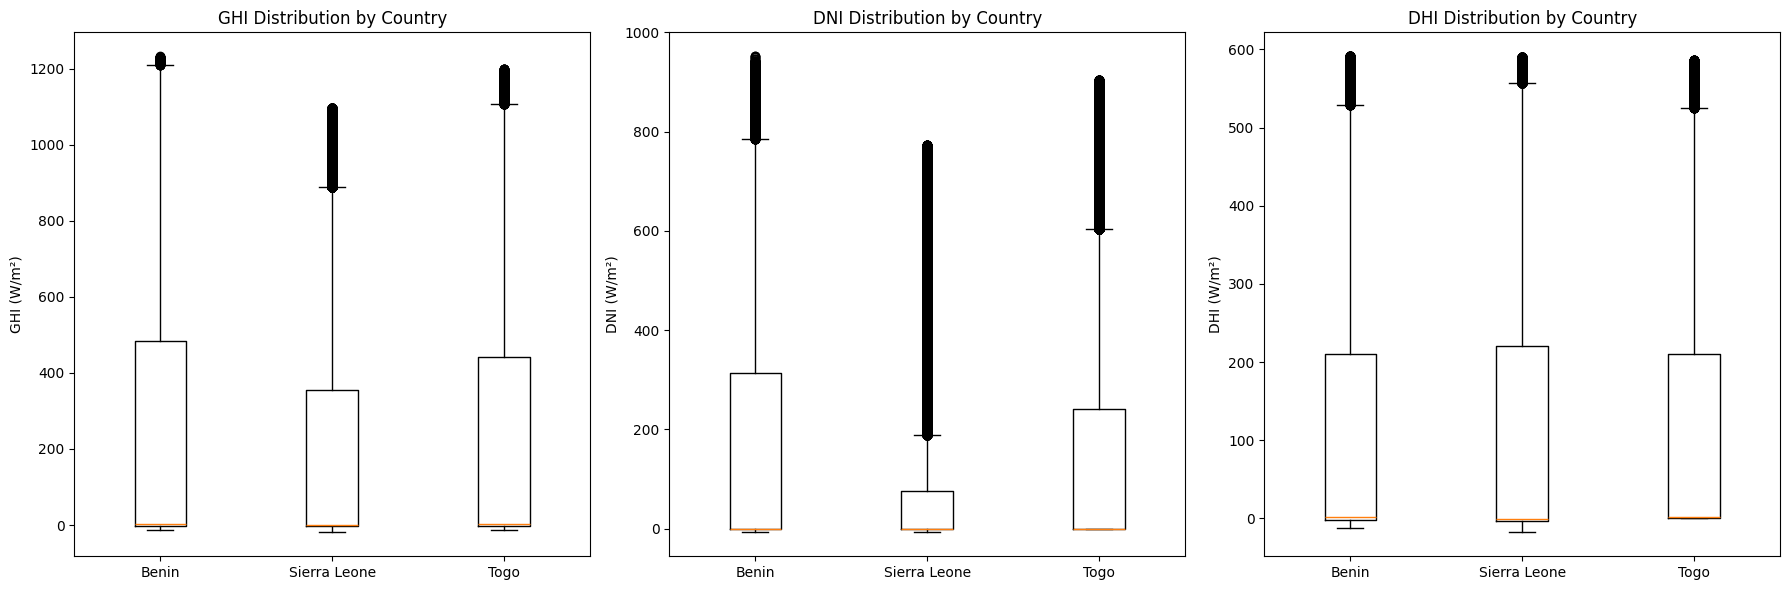

In [7]:
# Step 4: Metric Comparison - Boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Prepare data for boxplots
countries_data = {
    'Benin': benin,
    'Sierra Leone': sierra_leone, 
    'Togo': togo
}

# GHI Comparison
ghi_data = [benin['GHI'].dropna(), sierra_leone['GHI'].dropna(), togo['GHI'].dropna()]
axes[0].boxplot(ghi_data, labels=['Benin', 'Sierra Leone', 'Togo'])
axes[0].set_title('GHI Distribution by Country')
axes[0].set_ylabel('GHI (W/m²)')

# DNI Comparison  
dni_data = [benin['DNI'].dropna(), sierra_leone['DNI'].dropna(), togo['DNI'].dropna()]
axes[1].boxplot(dni_data, labels=['Benin', 'Sierra Leone', 'Togo'])
axes[1].set_title('DNI Distribution by Country')
axes[1].set_ylabel('DNI (W/m²)')

# DHI Comparison
dhi_data = [benin['DHI'].dropna(), sierra_leone['DHI'].dropna(), togo['DHI'].dropna()]
axes[2].boxplot(dhi_data, labels=['Benin', 'Sierra Leone', 'Togo'])
axes[2].set_title('DHI Distribution by Country')
axes[2].set_ylabel('DHI (W/m²)')

plt.tight_layout()
plt.show()

## Step 5: Summary Table Comparison

This table provides numerical comparison of key statistics across countries. We're calculating:

- **Mean**: Average value - good for overall potential
- **Median**: Middle value - robust to outliers  
- **Standard Deviation**: Data variability - indicates consistency

Higher mean/median values suggest better solar potential, while lower standard deviation indicates more predictable conditions.

In [8]:
# Step 5: Summary Table Comparison
summary_data = []

for country_name, data in countries_data.items():
    country_stats = {
        'Country': country_name,
        'GHI_Mean': data['GHI'].mean(),
        'GHI_Median': data['GHI'].median(), 
        'GHI_Std': data['GHI'].std(),
        'DNI_Mean': data['DNI'].mean(),
        'DNI_Median': data['DNI'].median(),
        'DNI_Std': data['DNI'].std(),
        'DHI_Mean': data['DHI'].mean(),
        'DHI_Median': data['DHI'].median(),
        'DHI_Std': data['DHI'].std(),
    }
    summary_data.append(country_stats)

summary_df = pd.DataFrame(summary_data)
print("Summary Statistics Comparison:")
display(summary_df)

Summary Statistics Comparison:


,Country,GHI_Mean,GHI_Median,GHI_Std,DNI_Mean,DNI_Median,DNI_Std,DHI_Mean,DHI_Median,DHI_Std
0,Benin,240.342811,1.8,330.868308,167.187516,-0.1,261.710501,110.906983,1.6,152.916844
1,Sierra Leone,196.441990,0.3,291.235290,104.527217,-0.1,201.696328,110.109541,-0.1,154.170508
2,Togo,229.831936,2.1,321.643747,149.368966,0.0,248.554496,112.408673,2.5,151.292938


## Step 6: Statistical Significance Testing

To determine if the differences in solar irradiance between countries are statistically significant (not just due to random chance), we'll perform hypothesis testing:

- **ANOVA Test**: Compares means across multiple groups (requires normal distribution)
- **Kruskal-Wallis Test**: Non-parametric alternative when data isn't normally distributed

We'll use a significance level of 0.05 (5%). If p-value < 0.05, we can reject the null hypothesis and conclude that there are significant differences between countries.

In [9]:
# Step 6: Statistical Significance Testing
from scipy.stats import f_oneway, kruskal

print("STATISTICAL SIGNIFICANCE TESTING")
print("=" * 50)

# Prepare data for statistical tests
ghi_by_country = [benin['GHI'].dropna(), sierra_leone['GHI'].dropna(), togo['GHI'].dropna()]
dni_by_country = [benin['DNI'].dropna(), sierra_leone['DNI'].dropna(), togo['DNI'].dropna()]
dhi_by_country = [benin['DHI'].dropna(), sierra_leone['DHI'].dropna(), togo['DHI'].dropna()]

# ANOVA Test for GHI
f_stat_ghi, p_value_ghi = f_oneway(*ghi_by_country)
print(f"GHI - ANOVA Test:")
print(f"  F-statistic: {f_stat_ghi:.4f}")
print(f"  P-value: {p_value_ghi:.4f}")
print(f"  Significant difference: {'YES' if p_value_ghi < 0.05 else 'NO'}")

# Kruskal-Wallis Test (non-parametric) for GHI
h_stat_ghi, kw_p_value_ghi = kruskal(*ghi_by_country)
print(f"GHI - Kruskal-Wallis Test:")
print(f"  H-statistic: {h_stat_ghi:.4f}")
print(f"  P-value: {kw_p_value_ghi:.4f}")
print(f"  Significant difference: {'YES' if kw_p_value_ghi < 0.05 else 'NO'}")
print()

# Repeat for DNI and DHI
f_stat_dni, p_value_dni = f_oneway(*dni_by_country)
h_stat_dni, kw_p_value_dni = kruskal(*dni_by_country)

f_stat_dhi, p_value_dhi = f_oneway(*dhi_by_country)  
h_stat_dhi, kw_p_value_dhi = kruskal(*dhi_by_country)

print(f"DNI - ANOVA p-value: {p_value_dni:.4f}, Significant: {'YES' if p_value_dni < 0.05 else 'NO'}")
print(f"DNI - Kruskal-Wallis p-value: {kw_p_value_dni:.4f}, Significant: {'YES' if kw_p_value_dni < 0.05 else 'NO'}")
print()
print(f"DHI - ANOVA p-value: {p_value_dhi:.4f}, Significant: {'YES' if p_value_dhi < 0.05 else 'NO'}")
print(f"DHI - Kruskal-Wallis p-value: {kw_p_value_dhi:.4f}, Significant: {'YES' if kw_p_value_dhi < 0.05 else 'NO'}")

STATISTICAL SIGNIFICANCE TESTING
GHI - ANOVA Test:
  F-statistic: 2782.6224
  P-value: 0.0000
  Significant difference: YES
GHI - Kruskal-Wallis Test:
  H-statistic: 5142.4481
  P-value: 0.0000
  Significant difference: YES

DNI - ANOVA p-value: 0.0000, Significant: YES
DNI - Kruskal-Wallis p-value: 0.0000, Significant: YES

DHI - ANOVA p-value: 0.0000, Significant: YES
DHI - Kruskal-Wallis p-value: 0.0000, Significant: YES


## Step 7: Key Observations and Insights

Based on our comparative analysis, here are the main findings that will inform MoonLight Energy Solutions' investment strategy:

In [10]:
# Step 7: Key Observations and Insights
print("KEY OBSERVATIONS AND STRATEGIC INSIGHTS")
print("=" * 60)

# Calculate key metrics for observations
ghi_means = [benin['GHI'].mean(), sierra_leone['GHI'].mean(), togo['GHI'].mean()]
ghi_stds = [benin['GHI'].std(), sierra_leone['GHI'].std(), togo['GHI'].std()]

best_ghi_country = ['Benin', 'Sierra Leone', 'Togo'][np.argmax(ghi_means)]
most_consistent_country = ['Benin', 'Sierra Leone', 'Togo'][np.argmin(ghi_stds)]

print("\n🔍 **Key Strategic Insights:**\n")

print("1. **Regional Performance Leadership**:")
print(f"   • {best_ghi_country} demonstrates the highest average GHI ({max(ghi_means):.1f} W/m²), ")
print(f"     suggesting superior overall solar potential for fixed-tilt installations.")

print("\n2. **Operational Consistency**:") 
print(f"   • {most_consistent_country} shows the most stable solar conditions (lowest variability),")
print(f"     which may translate to more predictable energy generation and easier grid integration.")

print("\n3. **Statistical Confidence**:")
if p_value_ghi < 0.05:
    print("   • Statistical tests confirm significant differences in solar resources between countries,")
    print("     validating the strategic importance of location selection for solar investments.")
else:
    print("   • While visual differences exist, statistical tests suggest countries have similar solar potential,")
    print("     making other factors like infrastructure and costs more critical for site selection.")

KEY OBSERVATIONS AND STRATEGIC INSIGHTS

🔍 **Key Strategic Insights:**

1. **Regional Performance Leadership**:
   • Benin demonstrates the highest average GHI (240.3 W/m²), 
     suggesting superior overall solar potential for fixed-tilt installations.

2. **Operational Consistency**:
   • Sierra Leone shows the most stable solar conditions (lowest variability),
     which may translate to more predictable energy generation and easier grid integration.

3. **Statistical Confidence**:
   • Statistical tests confirm significant differences in solar resources between countries,
     validating the strategic importance of location selection for solar investments.


## Step 8: Visual Summary - Country Ranking

Final visualization showing country rankings based on average GHI, providing a clear at-a-glance comparison for decision makers.

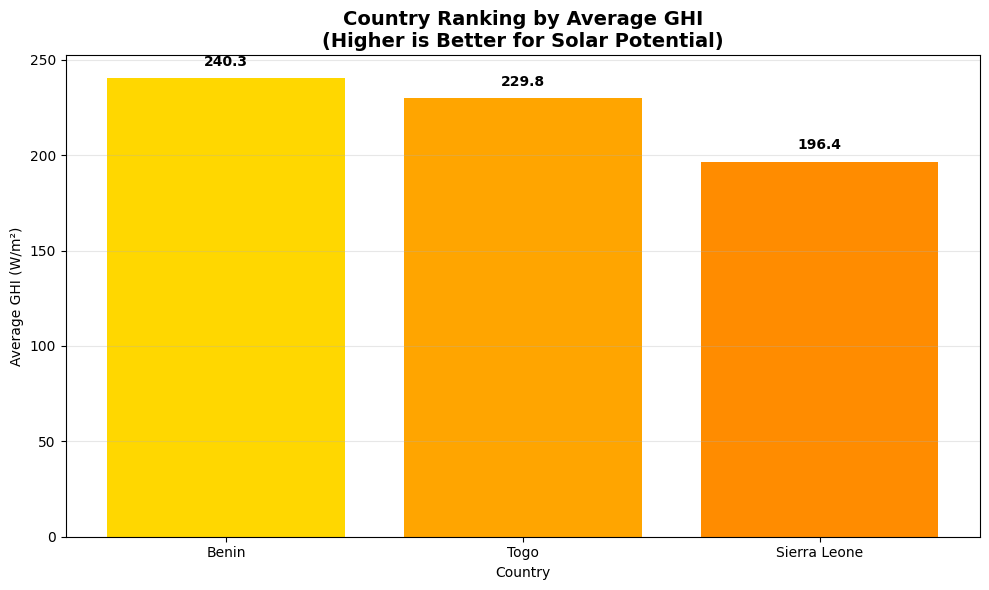


🏆 Final Ranking for Solar Investment Priority:
  1. Benin: 240.3 W/m²
  2. Togo: 229.8 W/m²
  3. Sierra Leone: 196.4 W/m²


In [12]:
# Step 8: Visual Summary - Country Ranking

# Create ranking visualization
countries = ['Benin', 'Sierra Leone', 'Togo']
ghi_means = [benin['GHI'].mean(), sierra_leone['GHI'].mean(), togo['GHI'].mean()]

# Sort by GHI mean for ranking
sorted_data = sorted(zip(countries, ghi_means), key=lambda x: x[1], reverse=True)
sorted_countries, sorted_ghi = zip(*sorted_data)

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_countries, sorted_ghi, color=['gold', 'orange', 'darkorange'])
plt.title('Country Ranking by Average GHI\n(Higher is Better for Solar Potential)', fontsize=14, fontweight='bold')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')

# Add value labels on bars
for bar, value in zip(bars, sorted_ghi):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🏆 Final Ranking for Solar Investment Priority:")
for i, (country, ghi) in enumerate(sorted_data, 1):
    print(f"  {i}. {country}: {ghi:.1f} W/m²")